# 🔥 Fire Detection using YOLOv8🔥

This notebook demonstrates the implementation of **Fire Detection** using **YOLOv8**, a state-of-the-art object detection model. The goal is to detect fire in images or video streams with high accuracy and efficiency. The workflow includes:

1. **Dataset Preparation:** Verify the dataset structure and visualize sample images.

2. **Model Training:** Train the YOLOv8 model on the fire detection dataset.

3. **Evaluation:** Evaluate the model's performance using metrics like mAP, precision, and recall.

4. **Visualization:** Plot training/validation loss curves, mAP at different IoU thresholds.

5. **Model Saving:** Save the trained model for deployment.

This implementation leverages the **Ultralytics** (YOLOv8) library, which provides a simple and efficient interface for training and evaluating object detection models.

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 35.1 MB/s eta 0:00:00


In [ ]:
import torch
import cv2
import os
import time
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Device agnostic code**

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Dataset
**Dataset Path**

In [5]:
DATASET_PATH = '/kaggle/input/Fire-Detection'
data_yaml = os.path.join(DATASET_PATH, 'data.yaml')

**Verify dataset structure**

In [6]:
def verify_dataset(dataset_path):
    required_dirs = ['train/images', 'train/labels', 'valid/images', 'valid/labels', 'test/images', 'test/labels']
    for dir_path in required_dirs:
        full_path = os.path.join(dataset_path, dir_path)
        if not os.path.exists(full_path):
            print(f"Warning: {full_path} not found")
        else:
            num_files = len(os.listdir(full_path))
            print(f"{full_path}: {num_files} files")
    
    # Check if data.yaml exists
    yaml_path = os.path.join(dataset_path, 'data.yaml')
    if os.path.exists(yaml_path):
        print(f"data.yaml found at {yaml_path}")
    else:
        print("Warning: data.yaml not found")

verify_dataset(DATASET_PATH)

/kaggle/input/Fire-Detection/train/images: 1004 files
/kaggle/input/Fire-Detection/train/labels: 1004 files
/kaggle/input/Fire-Detection/valid/images: 754 files
/kaggle/input/Fire-Detection/valid/labels: 754 files
/kaggle/input/Fire-Detection/test/images: 751 files
/kaggle/input/Fire-Detection/test/labels: 751 files
data.yaml found at /kaggle/input/Fire-Detection/data.yaml


**Visualize Images from Dataset**

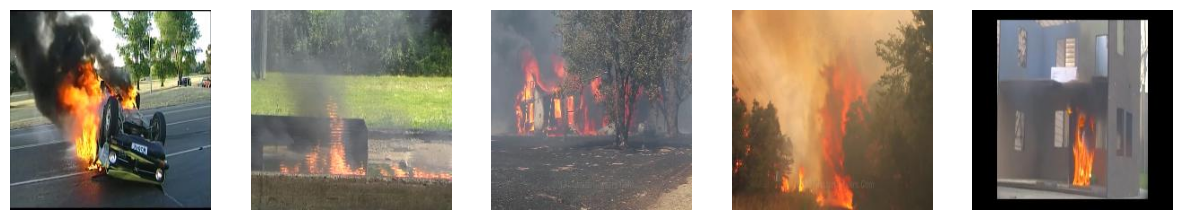

In [7]:
def visualize_dataset(dataset_path, num_images=5):
    images_dir = os.path.join(dataset_path, 'train', 'images')
    images = [os.path.join(images_dir, img) for img in os.listdir(images_dir)][:num_images]
    
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

visualize_dataset(DATASET_PATH)

## Load YOLOv8 model

In [8]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 173MB/s]


## Train YOLOv8 Model

In [9]:
start_time = time.time()

results = model.train(
    data=data_yaml,
    epochs=50,
    batch=16,
    imgsz=640,
    device=device,
    verbose=True,
    plots=False,
    save=True,
)

training_time = time.time() - start_time
print(f"Total training time: {training_time:.2f} seconds")

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/Fire-Detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 44.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 194MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/Fire-Detection/train/labels... 1004 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:03<00:00, 281.95it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/Fire-Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/Fire-Detection/valid/labels... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:02<00:00, 300.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/Fire-Detection/valid is not writeable, cache not saved.


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.18G      1.484        2.5      1.496         27        640: 100%|██████████| 63/63 [00:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.92it/s]


                   all        754        950      0.614      0.465      0.508      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.44G      1.501      1.987      1.499         41        640: 100%|██████████| 63/63 [00:11<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.31it/s]


                   all        754        950      0.281      0.276      0.193     0.0715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.44G      1.534      1.883      1.508         29        640: 100%|██████████| 63/63 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.62it/s]


                   all        754        950      0.579      0.473      0.522      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.44G      1.539       1.78      1.517         26        640: 100%|██████████| 63/63 [00:11<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.68it/s]


                   all        754        950      0.546      0.545      0.544      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.44G      1.482      1.619      1.484         32        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.75it/s]


                   all        754        950      0.608      0.654      0.607      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.44G      1.446      1.539      1.468         32        640: 100%|██████████| 63/63 [00:11<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.68it/s]


                   all        754        950      0.492      0.569      0.496      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.44G      1.443      1.474      1.454         27        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.73it/s]

                   all        754        950       0.52       0.66      0.556      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.44G      1.411      1.382      1.433         28        640: 100%|██████████| 63/63 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.69it/s]

                   all        754        950      0.739      0.657      0.735      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.44G      1.354      1.359      1.405         24        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.59it/s]

                   all        754        950      0.649      0.634      0.678      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.44G      1.373      1.311      1.413         32        640: 100%|██████████| 63/63 [00:11<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.70it/s]

                   all        754        950      0.681      0.678      0.687      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.44G      1.327      1.261      1.392         32        640: 100%|██████████| 63/63 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.85it/s]

                   all        754        950      0.835      0.735      0.827      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.44G       1.31      1.232      1.372         41        640: 100%|██████████| 63/63 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.72it/s]

                   all        754        950      0.773      0.704      0.786      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.44G       1.27       1.19      1.329         27        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.37it/s]

                   all        754        950      0.788      0.711      0.791      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.44G      1.291      1.195       1.35         27        640: 100%|██████████| 63/63 [00:11<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.84it/s]

                   all        754        950      0.663      0.746       0.74      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.44G      1.294      1.165      1.363         31        640: 100%|██████████| 63/63 [00:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.76it/s]

                   all        754        950      0.795      0.679      0.758      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.44G      1.262      1.173      1.331         28        640: 100%|██████████| 63/63 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.87it/s]

                   all        754        950      0.695      0.619      0.693      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.44G      1.241      1.119      1.316         34        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.68it/s]

                   all        754        950      0.851      0.706      0.829       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.44G      1.206      1.091      1.307         42        640: 100%|██████████| 63/63 [00:11<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.89it/s]

                   all        754        950      0.843      0.734      0.827      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.44G      1.186      1.069      1.286         23        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.79it/s]

                   all        754        950      0.799      0.757      0.814      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.44G      1.162      1.037      1.274         33        640: 100%|██████████| 63/63 [00:11<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.77it/s]

                   all        754        950      0.748      0.754      0.819      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.44G      1.202      1.074       1.29         38        640: 100%|██████████| 63/63 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.74it/s]

                   all        754        950      0.833      0.703      0.804      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.44G      1.165      1.037      1.263         32        640: 100%|██████████| 63/63 [00:11<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.72it/s]

                   all        754        950      0.843      0.754      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.44G      1.148      1.017      1.267         23        640: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.84it/s]

                   all        754        950      0.813       0.74      0.787       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.44G      1.136      1.025      1.257         32        640: 100%|██████████| 63/63 [00:11<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.77it/s]

                   all        754        950      0.858      0.727       0.82      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.44G      1.157      0.993      1.269         38        640: 100%|██████████| 63/63 [00:11<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.68it/s]

                   all        754        950      0.839       0.76      0.844      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.44G      1.101     0.9496      1.226         27        640: 100%|██████████| 63/63 [00:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.66it/s]

                   all        754        950      0.847      0.748       0.85      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.44G      1.117     0.9594      1.242         30        640: 100%|██████████| 63/63 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.69it/s]

                   all        754        950      0.851      0.722      0.836       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.44G      1.098     0.9592      1.231         45        640: 100%|██████████| 63/63 [00:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.68it/s]

                   all        754        950      0.899      0.761      0.881      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.44G      1.092      0.918      1.229         29        640: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.83it/s]

                   all        754        950      0.853      0.773      0.871      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.44G      1.083     0.9355      1.224         25        640: 100%|██████████| 63/63 [00:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.75it/s]

                   all        754        950      0.883      0.795      0.892      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.44G      1.075     0.8802       1.23         30        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.83it/s]

                   all        754        950      0.814      0.755      0.835      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.44G      1.044     0.8762      1.202         32        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.52it/s]

                   all        754        950      0.873      0.792      0.889      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.44G      1.031       0.85      1.182         30        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.88it/s]

                   all        754        950      0.892      0.796      0.893      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.44G      1.023     0.8531      1.192         26        640: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.49it/s]

                   all        754        950      0.903      0.805      0.901      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.44G      1.006     0.8013      1.167         30        640: 100%|██████████| 63/63 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.84it/s]

                   all        754        950      0.886        0.8      0.894      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.44G      1.012      0.817      1.187         19        640: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.59it/s]

                   all        754        950      0.906      0.752      0.877      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.44G     0.9865     0.8112      1.178         30        640: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.85it/s]

                   all        754        950      0.817      0.808       0.88      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.44G     0.9952     0.8082      1.171         36        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.59it/s]

                   all        754        950      0.929      0.775      0.886      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.44G      1.002     0.8044      1.174         23        640: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.83it/s]

                   all        754        950      0.887      0.777      0.892      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.44G     0.9992     0.7953      1.171         40        640: 100%|██████████| 63/63 [00:11<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.61it/s]

                   all        754        950       0.89      0.781      0.885      0.641


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.44G     0.9201     0.6731      1.117         16        640: 100%|██████████| 63/63 [00:11<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.97it/s]

                   all        754        950      0.883      0.815      0.893      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.44G     0.8856     0.6486      1.099         16        640: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.50it/s]

                   all        754        950      0.881      0.773      0.881      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.44G     0.8816     0.6311      1.102         20        640: 100%|██████████| 63/63 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.81it/s]

                   all        754        950      0.888      0.803      0.898      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.44G     0.8745     0.6014      1.086         17        640: 100%|██████████| 63/63 [00:11<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.59it/s]

                   all        754        950      0.902      0.809      0.902      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.44G     0.8552      0.609       1.07         18        640: 100%|██████████| 63/63 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.81it/s]

                   all        754        950      0.884      0.795      0.892      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.44G     0.8235     0.5843      1.056         20        640: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.54it/s]

                   all        754        950      0.908      0.801       0.91      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.44G     0.8212     0.5538      1.055         19        640: 100%|██████████| 63/63 [00:11<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.98it/s]

                   all        754        950      0.902        0.8      0.904      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.44G     0.8075     0.5569      1.054         16        640: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.59it/s]

                   all        754        950      0.895      0.811      0.905      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.44G      0.815     0.5626      1.055         15        640: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.04it/s]

                   all        754        950      0.893      0.803      0.903      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.44G     0.7935     0.5434      1.043         18        640: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.48it/s]

                   all        754        950      0.914      0.805      0.901      0.655



50 epochs completed in 0.225 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.39it/s]

                   all        754        950      0.908      0.801       0.91      0.669
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.9ms postprocess per image


Total training time: 846.90 seconds


## Plot Training and Validation Loss Curves

In [10]:
csv_path = "/kaggle/working/runs/detect/train/results.csv"

In [ ]:
# Load the CSV file
results_df = pd.read_csv(csv_path)

In [12]:
# Extract training and validation loss values
train_loss = results_df['train/box_loss'].values
val_loss = results_df['val/box_loss'].values

**Loss curves**

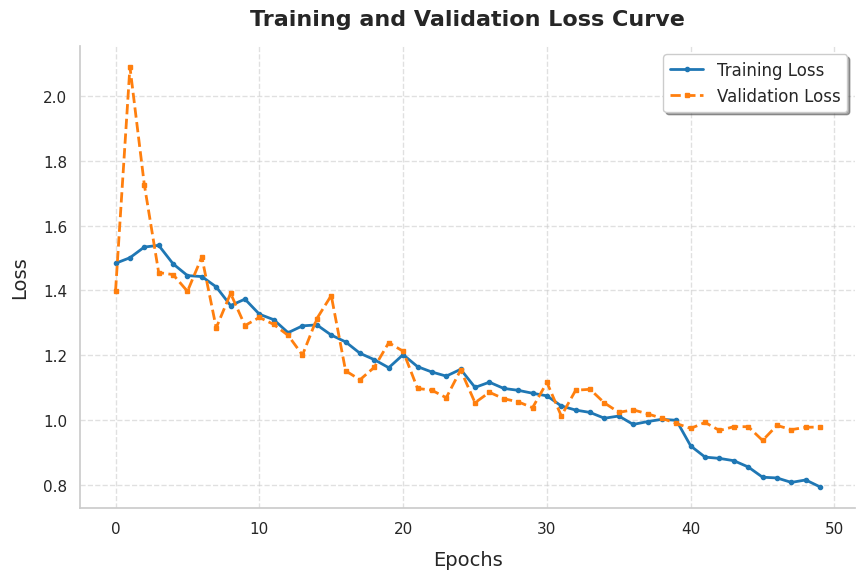

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

plt.plot(train_loss, label='Training Loss', marker='o', linestyle='-', markersize=3, linewidth=2, color='#1f77b4')
plt.plot(val_loss, label='Validation Loss', marker='s', linestyle='--', markersize=3, linewidth=2, color='#ff7f0e')
plt.title('Training and Validation Loss Curve', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Epochs', fontsize=14, labelpad=10)
plt.ylabel('Loss', fontsize=14, labelpad=10)

plt.legend(fontsize=12, loc='best', frameon=True, fancybox=True, shadow=True)

plt.grid(True, linestyle='--', alpha=0.6)

# Remove unnecessary borders
sns.despine()

plt.show()

**Bar chart for mAP at different IoU thresholds**

In [15]:
# Extract mAP values at different IoU thresholds
mAP50 = results.results_dict['metrics/mAP50(B)']
mAP50_95 = results.results_dict['metrics/mAP50-95(B)']

iou_thresholds = ['mAP50', 'mAP50-95']
mAP_values = [mAP50, mAP50_95]

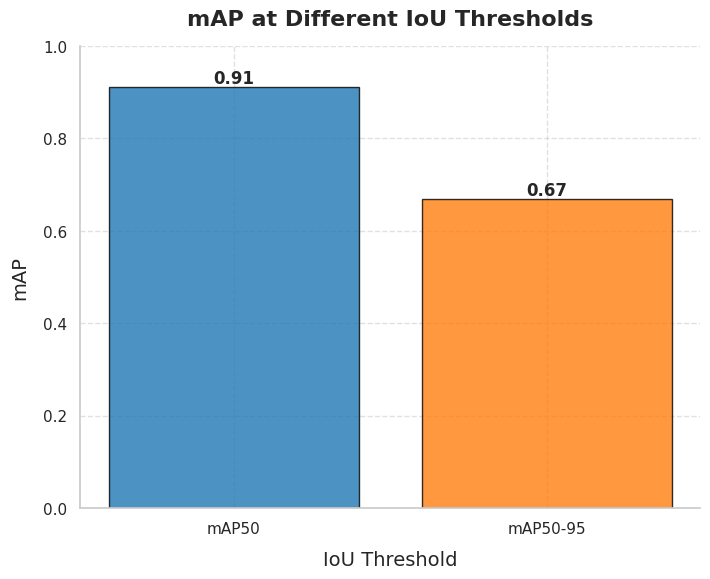

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

bars = plt.bar(iou_thresholds, mAP_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black', alpha=0.8)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('mAP at Different IoU Thresholds', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('IoU Threshold', fontsize=14, labelpad=10)
plt.ylabel('mAP', fontsize=14, labelpad=10)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)

sns.despine()
plt.show()

## Evaluate Model on Test Data


In [17]:
metrics = model.val()

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/Fire-Detection/valid/labels... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<00:00, 904.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/Fire-Detection/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:04<00:00, 11.60it/s]

                   all        754        950      0.909      0.804      0.911      0.668
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 0.7ms postprocess per image


In [18]:
print("Evaluation Metrics:")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")

Evaluation Metrics:
mAP50-95: 0.6679
Precision: 0.9094
Recall: 0.8042


## Save Model Weights

In [19]:
model_path = "fire_detection_yolov8n.pt"
model.export(format='torchscript')  # Export as PyTorch model
model.save(model_path)
print(f'Model saved at: {model_path}')

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 1.9s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (3.4s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/kaggle/input/Fire-Detection/data.yaml  
Visualize:       https://netron.app
Model saved at: fire_detection_yolov8n.pt


### Sample Predictions on Test Images


image 1/1 /kaggle/input/Fire-Detection/test/images/CarThree374_png.rf.c6b7b219bfff336f192a9fc047357094.jpg: 640x640 1 fire, 5.6ms
Speed: 2.2ms preprocess, 5.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


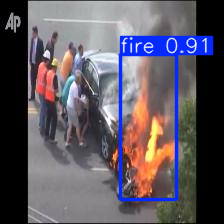


image 1/1 /kaggle/input/Fire-Detection/test/images/Img_25894_jpg.rf.d4b948067452ffab71d656012f18ac29.jpg: 640x640 2 fires, 5.8ms
Speed: 1.9ms preprocess, 5.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


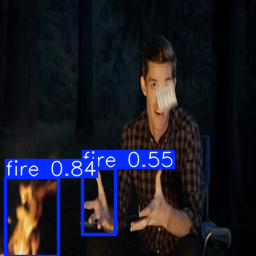

In [20]:
test_images_dir = os.path.join(DATASET_PATH, 'test', 'images')
test_images = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir)][6:8]

for img_path in test_images:
    results = model.predict(img_path)
    for result in results:
        result.show()

---